In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/oisin-brogan/Data/cooking_time/view_duration_sample_20170830.csv')
df

,event_time,log_time,guid,event,client_time,event_id,event_name,country,language,application_id,...,referer,via,ref,position,view_duration,local_event_time,resource_id,resource_owner_id,app_version,os_version
0,2017-08-02 12:01:56+00,2017-08-02 12:02:03+00,NaN,view_duration,NaN,NaN,NaN,ID,id,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,2017-07-31 11:30:20+00,2017-07-31 11:30:27+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
2,2017-07-24 12:51:48+00,2017-08-04 04:53:34+00,NaN,view_duration,NaN,NaN,NaN,AE,ar,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2017-08-04 21:24:09+00,2017-08-04 21:34:20+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
4,2017-08-20 15:07:46+00,2017-08-20 15:07:50+00,NaN,view_duration,NaN,NaN,NaN,SA,ar,1,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
5,2017-08-27 10:51:58+00,2017-08-27 10:56:30+00,NaN,view_duration,NaN,NaN,NaN,TW,zh-TW,1,...,NaN,NaN,NaN,NaN,4,2017-08-27 18:51:58,NaN,NaN,NaN,NaN
6,2017-08-04 02:18:54+00,2017-08-04 02:19:00+00,NaN,view_duration,NaN,NaN,NaN,ID,id,1,...,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
7,2017-08-26 12:33:31+00,2017-08-26 15:15:59+00,c0b790ff-ded7-4a33-aa0b-933821a766c8,view_duration,NaN,NaN,NaN,SA,ar,6,...,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
8,2017-08-20 01:20:22+00,2017-08-20 01:25:32+00,9664b694-f688-4bb0-9c86-364e142c60cf,view_duration,NaN,NaN,NaN,ID,id,6,...,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN
9,2017-08-06 06:51:05+00,2017-08-06 06:51:06+00,NaN,view_duration,NaN,NaN,NaN,GR,el,1,...,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN


In [3]:
df.view_duration.describe().round(1)

count     70000.0
mean         78.6
std         605.7
min           0.0
25%           5.0
50%          15.0
75%          40.0
max      127695.0
Name: view_duration, dtype: float64

In [4]:
df.view_duration.quantile(.95)

222.0

In [5]:
reasonable = df[df.view_duration < df.view_duration.quantile(.95)]

In [6]:
df.groupby('application_id').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
application_id,,,,,,,,
1,40064.0,85.481505,729.791777,0.0,5.0,14.0,38.0,127695.0
2,5068.0,66.535714,313.583640,0.0,4.0,14.0,37.0,8371.0
6,24868.0,69.994290,392.933218,1.0,6.0,17.0,42.0,25154.0


In [7]:
df.groupby('language').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
ar,16518.0,49.588449,200.623749,0.0,4.0,12.0,32.00,8962.0
da,1.0,111.000000,NaN,111.0,111.0,111.0,111.00,111.0
el,860.0,88.905814,318.735280,0.0,7.0,21.0,50.25,4021.0
en,2220.0,92.327477,322.204886,0.0,5.0,15.0,43.00,5919.0
es,8772.0,87.167921,362.486032,0.0,6.0,17.0,46.00,14229.0
fa,18.0,17.666667,24.774275,1.0,2.0,8.0,25.75,97.0
fr,17.0,49.000000,104.586687,0.0,4.0,14.0,15.00,355.0
hu,2772.0,136.141775,543.707844,0.0,6.0,18.0,49.00,9839.0
id,32637.0,82.696878,420.042234,0.0,6.0,16.0,41.00,25154.0


In [8]:
df.groupby('country').view_duration.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AE,871.0,56.820896,209.040298,0.0,4.00,13.0,34.00,3331.0
AR,2580.0,91.797287,358.951030,0.0,6.00,17.0,46.00,5865.0
BH,224.0,44.781250,133.586610,0.0,5.00,15.0,38.25,1349.0
BO,56.0,83.714286,244.262952,1.0,6.00,20.0,49.00,1526.0
BR,45.0,32.244444,51.412395,0.0,6.00,17.0,34.00,315.0
CL,601.0,86.349418,338.595232,0.0,6.00,19.0,46.00,4337.0
CO,186.0,64.451613,163.042824,0.0,7.00,20.0,55.50,1214.0
CR,69.0,94.043478,201.505688,0.0,4.00,17.0,60.00,1019.0
CU,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0


In [75]:
from scipy.stats import mannwhitneyu

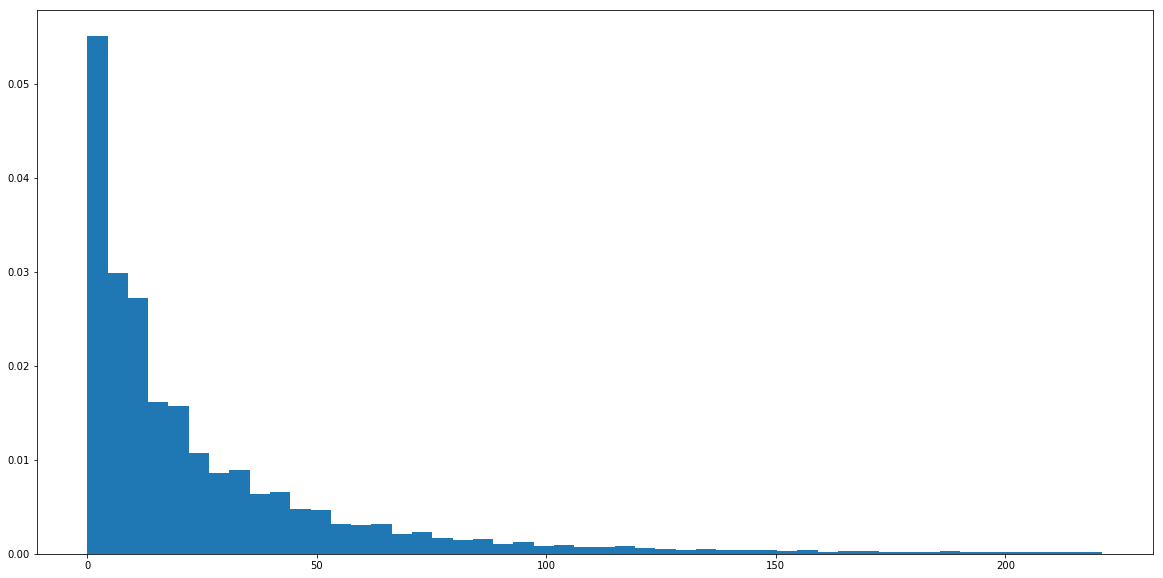

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20,10])
junk = plt.hist(reasonable.view_duration, bins=50, normed = True)

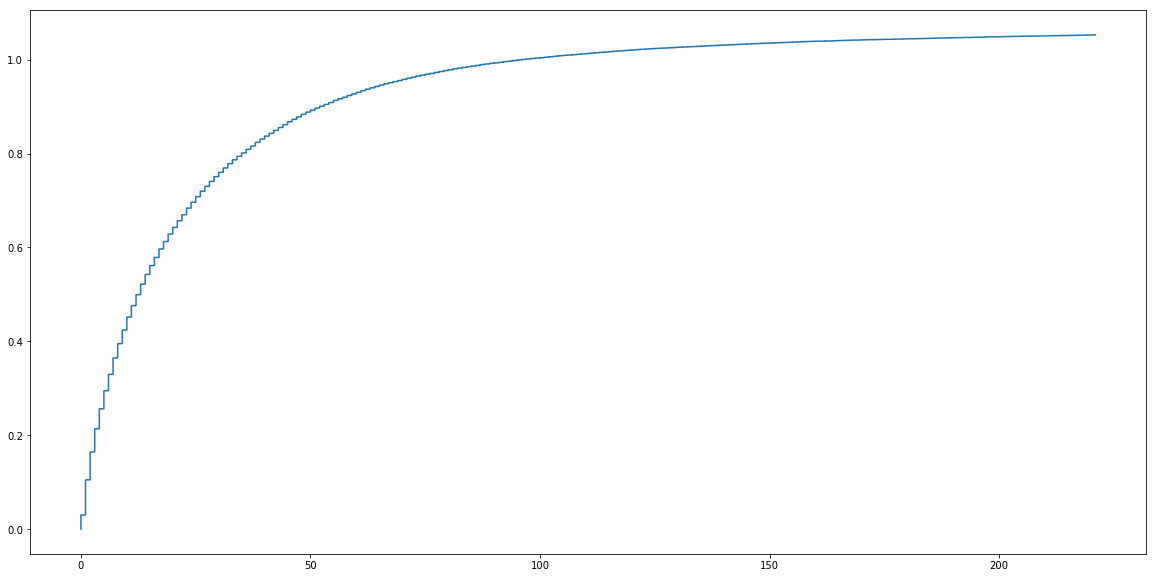

In [10]:
fig = plt.figure(figsize=[20,10])
plt.plot(reasonable.view_duration.sort_values().values, reasonable.index/reasonable.shape[0])

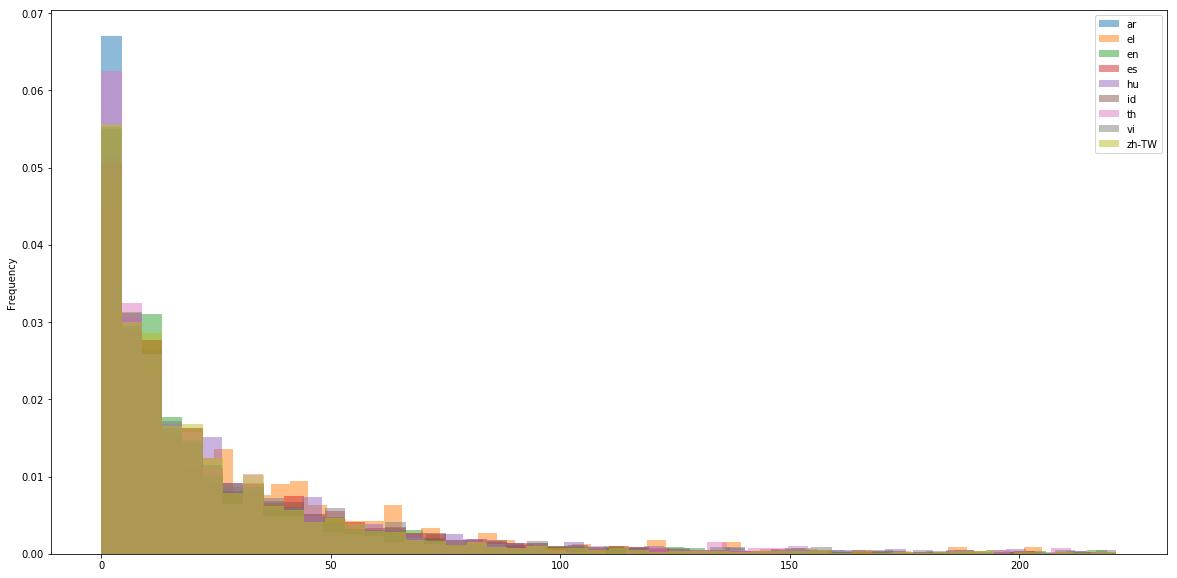

In [56]:
ax = reasonable.groupby('language').filter(lambda x: len(x) > 100).groupby('language').view_duration.plot(bins=50, normed = True,
                                                                    kind = 'hist', figsize=(20,10), legend = True, alpha = .5)

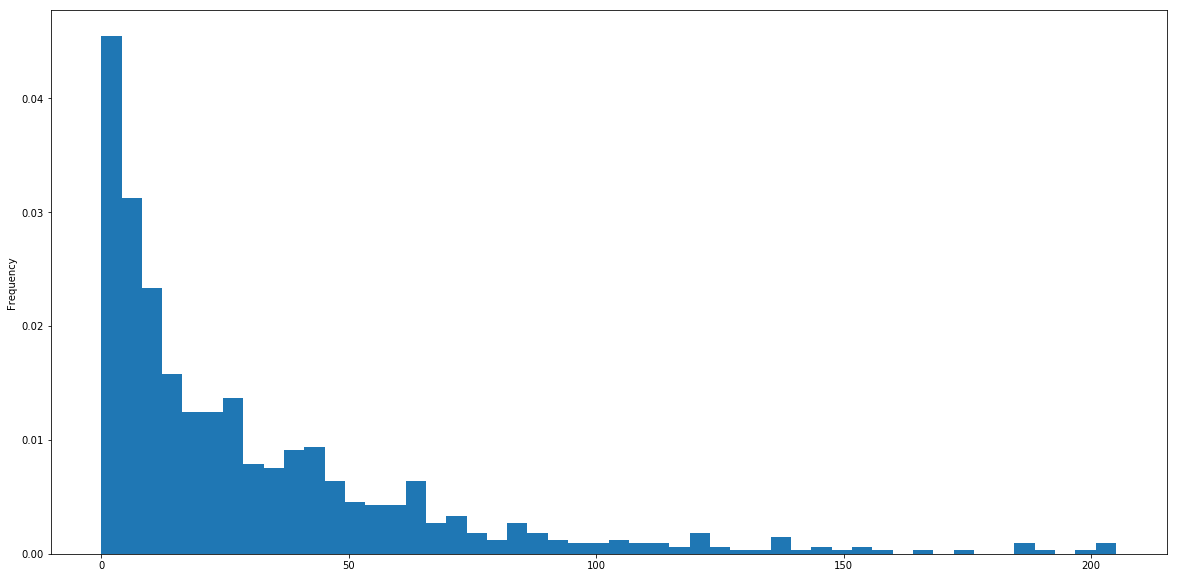

In [85]:
ax = reasonable[reasonable.language == 'el'].view_duration.plot(bins=50, figsize = [20,10], normed = True, kind = 'hist')